In [94]:
import json
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import mdp as m

In [93]:
with open("stimuli/stimuli_5_5_6.json") as f:
    s = json.load(f)

In [155]:
def viz(board):
    # board = s["game_state"]
    plt.figure() 
    for i, row in enumerate(board):
        for j, cell in enumerate(row):
            color = "gray" if cell == -1 else "none"

            plt.gca().add_patch(plt.Rectangle((j, len(board) - i), 1, 1, ec="k", fc=color, lw=4))
            if cell != -1:
                plt.text(j + 0.45, len(board) - i + 0.45, str(cell), fontsize=22)

    plt.autoscale()
    plt.axis("off")

    plt.axis("equal")
    plt.tight_layout()

In [305]:
reload(m)

<module 'mdp' from '/home/tony/repos/minesweeper/mdp.py'>

In [362]:
i = 0
mdp = m.MineSweeper(np.array(s[i]["game_state"]), *s[i]["naive_hard_probe"], n_mines=s[i]["num_mines"])
state = mdp.board_to_state(s[i]["game_state"])

In [363]:
states = mdp.traverse(state)

[[ 0 -1  0  0 -1]
 [ 0 -1 -1 -1 -1]
 [ 0 -1  0 -1  0]
 [ 0 -1  0  0 -1]
 [-1  0  0  0  0]]
trying  [(0, 0)]
trying  [(0, 2)]
trying  [(0, 3)]
trying  [(1, 0)]
trying  [(2, 0)]
trying  [(2, 2)]
trying  [(2, 4)]
trying  [(3, 0)]
trying  [(3, 2)]
trying  [(3, 3)]
trying  [(4, 1)]
trying  [(4, 2)]
trying  [(4, 3)]
trying  [(4, 4)]
trying  [(0, 0), (0, 2)]
trying  [(0, 0), (1, 0)]
trying  [(0, 0), (2, 0)]
trying  [(0, 2), (0, 0)]
trying  [(0, 2), (0, 3)]
trying  [(0, 2), (2, 2)]
trying  [(0, 3), (0, 2)]
trying  [(1, 0), (0, 0)]
trying  [(1, 0), (2, 0)]
trying  [(1, 0), (3, 0)]
trying  [(2, 0), (0, 0)]
trying  [(2, 0), (1, 0)]
trying  [(2, 0), (2, 2)]
trying  [(2, 0), (3, 0)]
trying  [(2, 2), (0, 2)]
trying  [(2, 2), (2, 0)]
trying  [(2, 2), (2, 4)]
trying  [(2, 2), (3, 2)]
trying  [(2, 2), (3, 3)]
trying  [(2, 2), (4, 2)]
trying  [(2, 4), (2, 2)]
trying  [(2, 4), (3, 3)]
trying  [(2, 4), (4, 4)]
trying  [(3, 0), (1, 0)]
trying  [(3, 0), (2, 0)]
trying  [(3, 0), (3, 2)]
trying  [(3, 0), (4, 

In [341]:
Q, V = m.vi(mdp, states)

In [342]:
root = m.tree(mdp, state, Q, V)

6
2 4
0.75
[7.5        2.5        6.07142857 5.75279    6.821      6.425
 6.425      6.425      6.425      6.425      6.425      6.425
 6.425      6.425      4.75279    5.821      5.07142857 4.75279
 4.75279    4.75279    5.821      5.821      5.821      5.821
 5.425      5.425      5.821      5.425      5.425      5.425
 5.425      5.425      5.425      5.821      5.821      5.821
 5.425      5.425      5.425      5.425      5.425      5.425
 5.425      5.425      5.425      5.425      5.425      5.425
 4.75279    5.425      5.821      5.821      5.425      5.425
 5.425      5.1775    ]


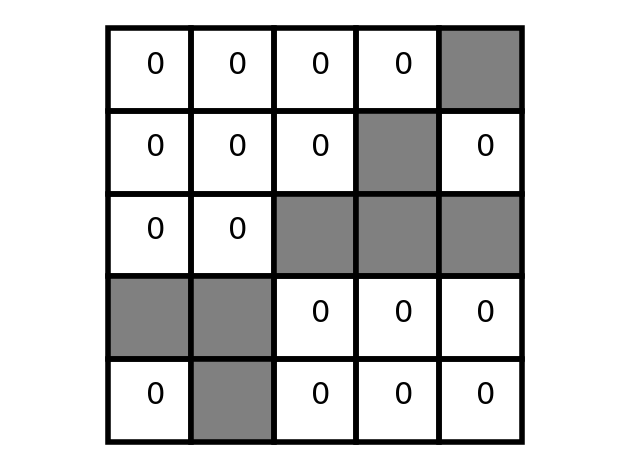

In [343]:
node = root
while node.children:
    a = list(node.children.keys())[0]
    print(a)
    viz(node.state)
    print(node.data[a])
    print(node.value)
    print("next state", mdp.tr(node.state, mdp.actions[a]))
    node = node.children[a]
viz(node.state)
print(mdp.n_mines)
print(mdp.x, mdp.y)
print(mdp.p_mine(node.state, mdp.x, mdp.y))
print(Q[mdp.hash(node.state)])

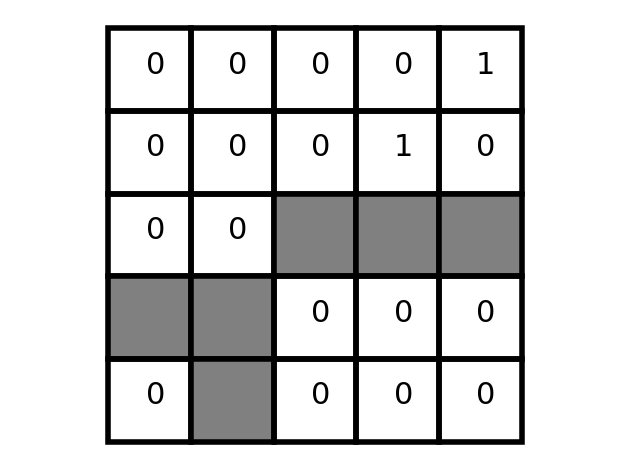

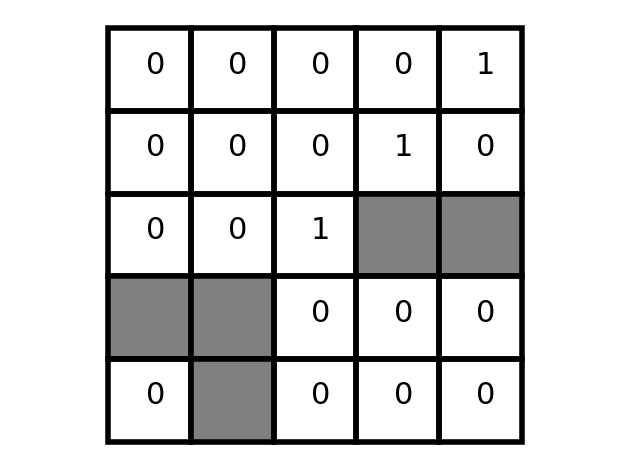

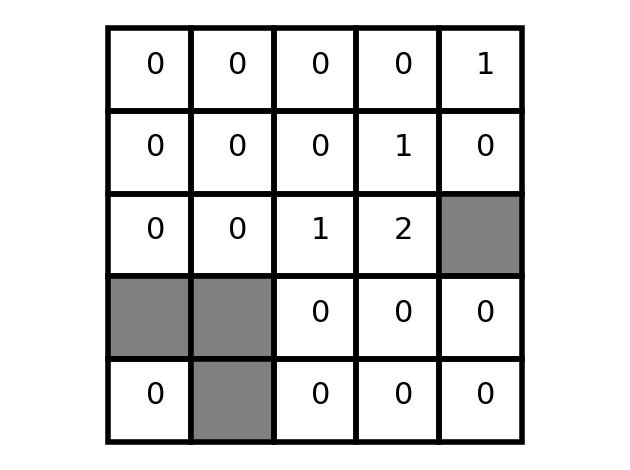

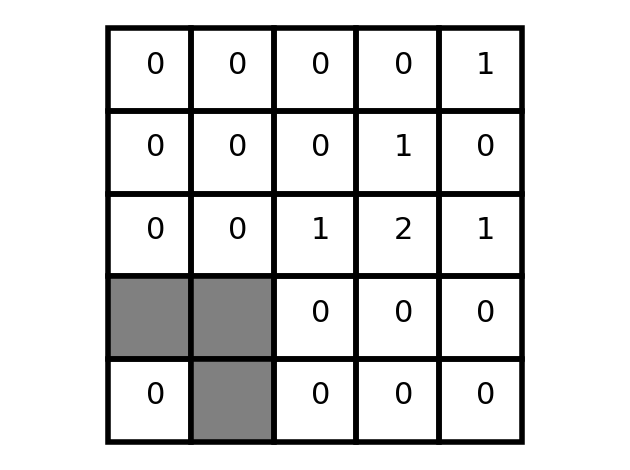

In [354]:
snew = state
for a in [[(0, 3)], [(1, 1)], [(1, 2)], [(3, 4)]]:
    snew, *_ = mdp.tr(snew, a)
    snew = snew[0]
    viz(snew)

In [264]:
tmp = np.array(
    [
        [0, -1, 0, 0, -1],
        [0, -1, -1, -1, -1],
        [0, -1, 0, -1, 0],
        [0, -1, 0, 0, 1],
        [-1, 0, 0, 0, 0],
    ]
)

In [246]:
print(list(mdp.solve_multiple_rref(tmp, [(0, 2), (0, 3)])))

print(list(mdp.solve_multiple_rref(state, [[2, 0], [3, 0]])))
print(list(mdp.solve_multiple_rref(state, [[1, 0], [2, 0], [3, 0]])))

[]
[(1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]
[(0, 1, 1), (1, 1, 2), (2, 1, 1), (3, 1, 1), (4, 0, 1)]


In [41]:
[a for i, a in enumerate(mdp.actions) if Q[mdp.hash(state)][i] == Q[mdp.hash(state)].max()]

[[(4, 3)], [(4, 4)]]

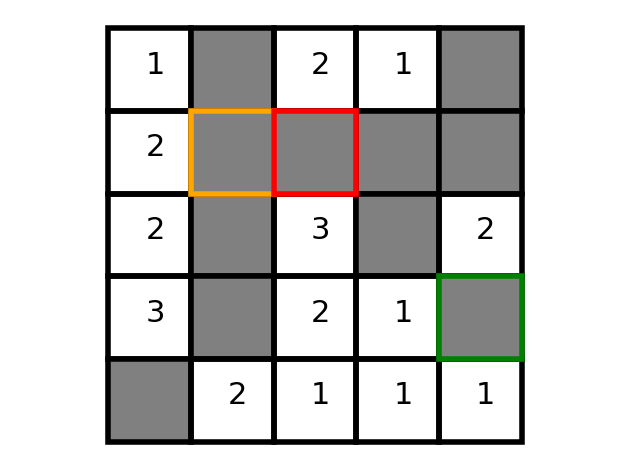

In [17]:
viz(s[0]["game_state"])

for (i, j), c in zip((s[0]["naive_easy_probe"], s[0]["naive_hard_probe"], s[0]["non_naive_probe"]), ("green", "orange", "red")):
    plt.gca().add_patch(plt.Rectangle((j, len(s[0]["game_state"]) - i), 1, 1, ec=c, fc="gray", lw=4))


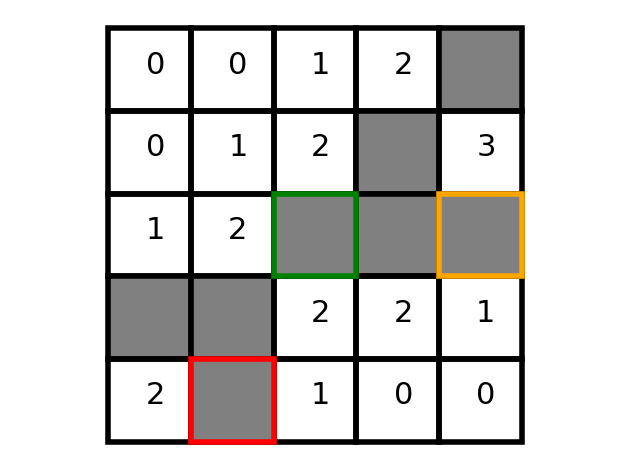

In [334]:
viz(s[1]["game_state"])

for (i, j), c in zip((s[1]["naive_easy_probe"], s[1]["naive_hard_probe"], s[1]["non_naive_probe"]), ("green", "orange", "red")):
    plt.gca().add_patch(plt.Rectangle((j, len(s[1]["game_state"]) - i), 1, 1, ec=c, fc="gray", lw=4))

In [112]:
for i, a in enumerate(mdp.actions):
    print(i, a)

0 flag
1 clear
2 [(0, 0)]
3 [(0, 2)]
4 [(0, 3)]
5 [(1, 0)]
6 [(2, 0)]
7 [(2, 2)]
8 [(2, 4)]
9 [(3, 0)]
10 [(3, 2)]
11 [(3, 3)]
12 [(4, 1)]
13 [(4, 2)]
14 [(4, 3)]
15 [(4, 4)]
16 [(0, 0), (0, 2)]
17 [(0, 0), (1, 0)]
18 [(0, 0), (2, 0)]
19 [(0, 2), (0, 0)]
20 [(0, 2), (0, 3)]
21 [(0, 2), (2, 2)]
22 [(0, 3), (0, 2)]
23 [(1, 0), (0, 0)]
24 [(1, 0), (2, 0)]
25 [(1, 0), (3, 0)]
26 [(2, 0), (0, 0)]
27 [(2, 0), (1, 0)]
28 [(2, 0), (2, 2)]
29 [(2, 0), (3, 0)]
30 [(2, 2), (0, 2)]
31 [(2, 2), (2, 0)]
32 [(2, 2), (2, 4)]
33 [(2, 2), (3, 2)]
34 [(2, 2), (3, 3)]
35 [(2, 2), (4, 2)]
36 [(2, 4), (2, 2)]
37 [(2, 4), (3, 3)]
38 [(2, 4), (4, 4)]
39 [(3, 0), (1, 0)]
40 [(3, 0), (2, 0)]
41 [(3, 0), (3, 2)]
42 [(3, 0), (4, 1)]
43 [(3, 2), (2, 2)]
44 [(3, 2), (3, 0)]
45 [(3, 2), (3, 3)]
46 [(3, 2), (4, 1)]
47 [(3, 2), (4, 2)]
48 [(3, 2), (4, 3)]
49 [(3, 3), (2, 2)]
50 [(3, 3), (2, 4)]
51 [(3, 3), (3, 2)]
52 [(3, 3), (4, 2)]
53 [(3, 3), (4, 3)]
54 [(3, 3), (4, 4)]
55 [(4, 1), (3, 0)]
56 [(4, 1), (3, 2)]
57 [(

In [14]:
s[0]["game_state"]

[[1, -1, 2, 1, -1],
 [2, -1, -1, -1, -1],
 [2, -1, 3, -1, 2],
 [3, -1, 2, 1, -1],
 [-1, 2, 1, 1, 1]]

In [62]:
s[0]

{'length': 5,
 'width': 5,
 'num_mines': 6,
 'game_board': [[1, -1, 2, 1, 1],
  [2, 2, 3, -1, 1],
  [2, -1, 3, 2, 2],
  [3, -1, 2, 1, -1],
  [-1, 2, 1, 1, 1]],
 'game_state': [[1, -1, 2, 1, -1],
  [2, -1, -1, -1, -1],
  [2, -1, 3, -1, 2],
  [3, -1, 2, 1, -1],
  [-1, 2, 1, 1, 1]],
 'naive_solution': [[1, -3, 2, 1, -1],
  [2, -4, -1, -1, -1],
  [2, -3, 3, -4, 2],
  [3, -3, 2, 1, -3],
  [-3, 2, 1, 1, 1]],
 'naive_steps': [[-1, 3, -1, -1, 0],
  [-1, 2, 0, 0, 0],
  [-1, 1, -1, 2, -1],
  [-1, 1, -1, -1, 1],
  [1, -1, -1, -1, -1]],
 'solution': [[1, -3, 2, 1, -4],
  [2, -4, -4, -3, -4],
  [2, -3, 3, -4, 2],
  [3, -3, 2, 1, -3],
  [-3, 2, 1, 1, 1]],
 'non_naive_probe': [1, 2],
 'naive_easy_probe': [3, 4],
 'naive_hard_probe': [1, 1],
 'naive_easy_steps': 1,
 'naive_hard_steps': 2}

In [86]:
len(s)

24